## Compare Data Completeness Over Time

**Description**: Analyze the trend of missing data in `"sales_data.csv"` over several months stored in a "date" column. Visualize missing data rates by month.

In [1]:
import pandas as pd

data = {
    'date': [
        '2025-01-05', '2025-01-12', '2025-01-20',
        '2025-02-02', '2025-02-18', '2025-02-25',
        '2025-03-03', '2025-03-15', '2025-03-22',
        '2025-04-05', '2025-04-18', '2025-04-25'
    ],
    'sales': [100, None, 150, 200, None, 250, 300, 350, None, 400, 450, None],
    'region': ['North', 'South', None, 'East', 'West', 'North', 'South', 'East', 'West', 'North', 'South', 'East'],
    'customer_id': [1, 2, 3, 4, None, 5, 6, 7, 8, 9, 10, 11]
}

df = pd.DataFrame(data)
df.to_csv('sales_data.csv', index=False)

print("Sample sales_data.csv created!")


Sample sales_data.csv created!


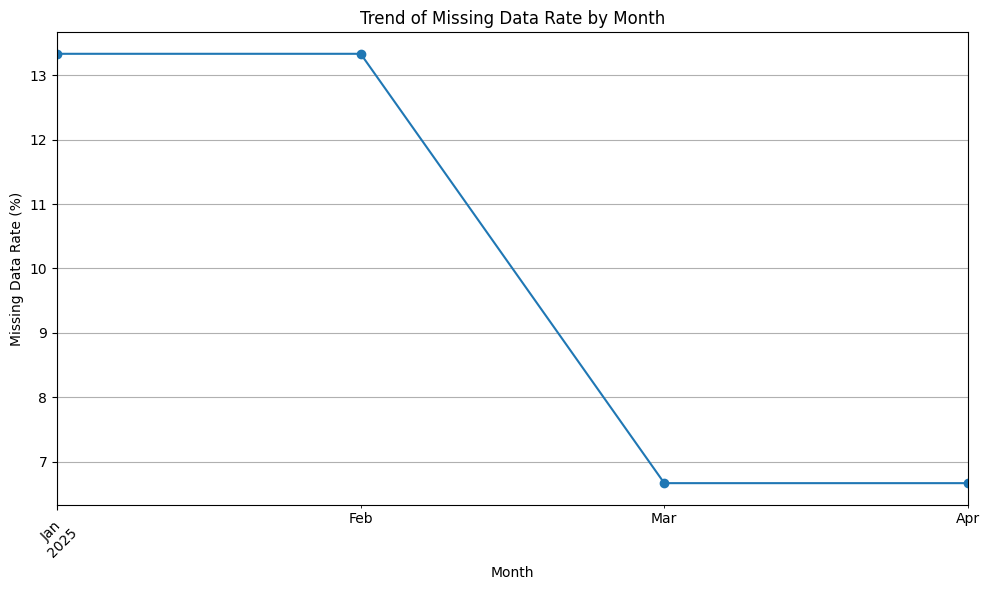

In [2]:
# Write your code from here

import pandas as pd
import matplotlib.pyplot as plt

# Load data
sales_df = pd.read_csv('sales_data.csv')

# Convert 'date' column to datetime
sales_df['date'] = pd.to_datetime(sales_df['date'])

# Extract month-year for grouping
sales_df['month'] = sales_df['date'].dt.to_period('M')

# Calculate missing data rate per month (mean of missing values in all columns)
missing_rate_by_month = sales_df.groupby('month').apply(lambda x: x.isnull().mean().mean()) * 100

# Plotting
plt.figure(figsize=(10, 6))
missing_rate_by_month.plot(marker='o')
plt.title('Trend of Missing Data Rate by Month')
plt.xlabel('Month')
plt.ylabel('Missing Data Rate (%)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
